In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [26]:
df = pd.read_csv("C:/Users/USER/Desktop/PaperWork_Dataset/resampled.csv")
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,45558,6,16/02/2018 01:48:14,4161431,5,3,935.0,351.0,935.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,53,17,28/02/2018 08:36:08,121329,2,2,80.0,292.0,40.0,40.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,3389,6,23/02/2018 01:08:47,1610453,8,7,1148.0,1581.0,677.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,50568,6,15/02/2018 11:28:53,22,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,53,17,14/02/2018 01:27:40,730,1,1,48.0,102.0,48.0,48.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,8080,6,02/03/2018 03:02:34,475,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
249996,8080,6,02/03/2018 02:44:01,10015,3,4,326.0,129.0,326.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
249997,8080,6,02/03/2018 03:50:51,583,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
249998,8080,6,02/03/2018 10:58:12,485,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot


Text(0.5, 1.0, 'Label')

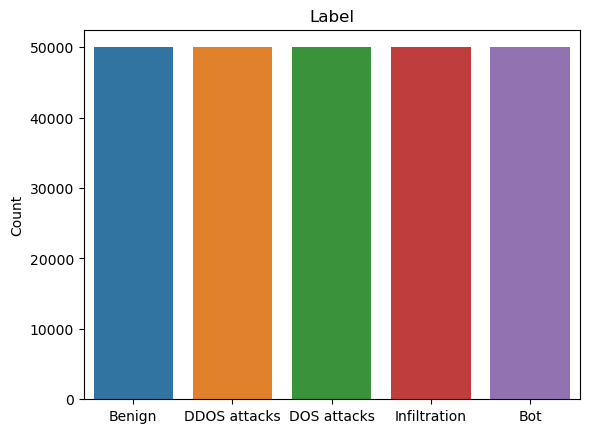

In [27]:
sns.countplot(data = df, x="Label")
plt.xlabel("")
plt.ylabel("Count")
plt.title("Label")

In [4]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [5]:
# Label encoding

label_encoder = LabelEncoder()
df['Label']= label_encoder.fit_transform(df['Label'])
df['Label'].unique()

array([0, 2, 3, 4, 1])

In [6]:
X = df.drop(columns = ['Timestamp', 'Dst Port', 'Tot Bwd Pkts', 'TotLen Bwd Pkts', 'Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg',
                      'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
                      'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Label'], axis=1)
X

,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,6,4161431,5,935.0,935.0,0.0,187.000000,418.144712,351.0,0.0,...,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,121329,2,80.0,40.0,40.0,40.000000,0.000000,146.0,146.0,...,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,1610453,8,1148.0,677.0,0.0,143.500000,228.129662,1173.0,0.0,...,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,22,1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,730,1,48.0,48.0,48.0,48.000000,0.000000,102.0,102.0,...,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,6,475,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249996,6,10015,3,326.0,326.0,0.0,108.666667,188.216188,112.0,0.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249997,6,583,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249998,6,485,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
'''
for idx, column_name in enumerate(df.columns, start=0):
    print(f"Column {idx}: {column_name}")
'''

'\nfor idx, column_name in enumerate(df.columns, start=0):\n    print(f"Column {idx}: {column_name}")\n'

In [7]:
y = df['Label']
y.value_counts()

Label
0    50000
2    50000
3    50000
4    50000
1    50000
Name: count, dtype: int64

In [3]:
'''
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest 객체 생성 및 특성 선택
selector = SelectKBest(score_func=f_classif, k='all')
X = selector.fit_transform(X, y)

# 선택된 특성의 인덱스와 해당 특성들의 점수 출력
selected_indices = selector.get_support(indices=True)
selected_scores = selector.scores_

for idx, score in zip(selected_indices, selected_scores):
    print(f"Feature {idx}: {score}")
'''

'\nfrom sklearn.feature_selection import SelectKBest, f_classif\n\n# SelectKBest 객체 생성 및 특성 선택\nselector = SelectKBest(score_func=f_classif, k=\'all\')\nX = selector.fit_transform(X, y)\n\n# 선택된 특성의 인덱스와 해당 특성들의 점수 출력\nselected_indices = selector.get_support(indices=True)\nselected_scores = selector.scores_\n\nfor idx, score in zip(selected_indices, selected_scores):\n    print(f"Feature {idx}: {score}")\n'

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, random_state = 123)
X_train = X_train.values
X_test = X_test.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225000, 65), (25000, 65), (225000,), (25000,))

In [9]:
# MinMaxScailing

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [11]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(225000, 65)
(25000, 65)
(225000, 5)
(25000, 5)


In [12]:
#데이터셋을 3차원으로 변환

X_train_re = X_train_scaled.reshape(len(X_train_scaled), X_train_scaled.shape[1], 1)
X_test_re = X_test_scaled.reshape(len(X_test_scaled), X_test_scaled.shape[1], 1)
X_train_re.shape, X_test_re.shape

((225000, 65, 1), (25000, 65, 1))

In [13]:
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, MaxPooling1D
from tensorflow.keras.layers import Input, Reshape
from keras.layers import Dense, Flatten, Dropout

In [14]:
input_layer = Input(shape=(65, 1))

conv1 = Conv1D(filters=100, kernel_size=8, padding = 'same', activation='relu')(input_layer)
maxpooling1 = MaxPooling1D(pool_size=2)(conv1)
lstm1 = LSTM(units=100, activation='relu', return_sequences=True)(maxpooling1)
flatten = Flatten()(lstm1)
dropout = Dropout(rate = 0.3)(flatten)
dens1 = Dense(120, activation = "relu")(dropout)
dens2 = Dense(100, activation = "relu")(dens1)
outputs = Dense(5, activation = "softmax")(dens2)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 65, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 65, 100)           900       
                                                                 
 max_pooling1d (MaxPooling1  (None, 32, 100)           0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 32, 100)           80400     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dropout (Dropout)           (None, 3200)              0         
                                                          

In [15]:
train_epochs = 20
history = model.fit(X_train_re, y_train_onehot, epochs=train_epochs, validation_data = (X_test_re, y_test_onehot))

Epoch 1/20


7032/7032 [==============================] - 173s 24ms/step - loss: 0.2654 - accuracy: 0.8972 - val_loss: 0.1709 - val_accuracy: 0.9164
Epoch 2/20
7032/7032 [==============================] - 170s 24ms/step - loss: 0.1610 - accuracy: 0.9264 - val_loss: 0.1533 - val_accuracy: 0.9304
Epoch 3/20
7032/7032 [==============================] - 174s 25ms/step - loss: 0.1475 - accuracy: 0.9310 - val_loss: 0.1376 - val_accuracy: 0.9331
Epoch 4/20
7032/7032 [==============================] - 175s 25ms/step - loss: 0.1409 - accuracy: 0.9330 - val_loss: 0.1368 - val_accuracy: 0.9328
Epoch 5/20
7032/7032 [==============================] - 177s 25ms/step - loss: 0.1377 - accuracy: 0.9336 - val_loss: 0.1351 - val_accuracy: 0.9333
Epoch 6/20
7032/7032 [==============================] - 177s 25ms/step - loss: 0.1360 - accuracy: 0.9343 - val_loss: 0.1355 - val_accuracy: 0.9346
Epoch 7/20
7032/7032 [==============================] - 178s 25ms/step - loss: 0.1350 - accuracy: 0.9345 - val_loss:

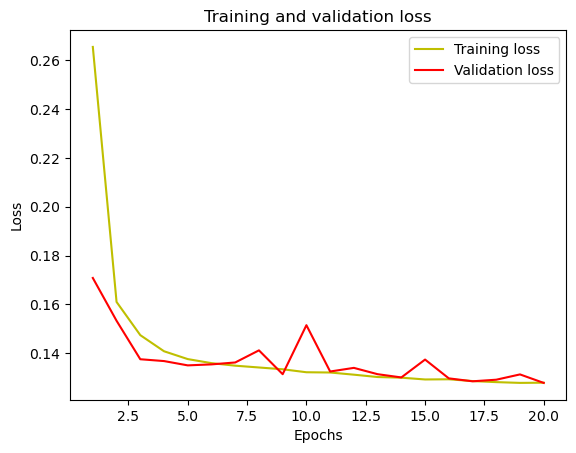

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

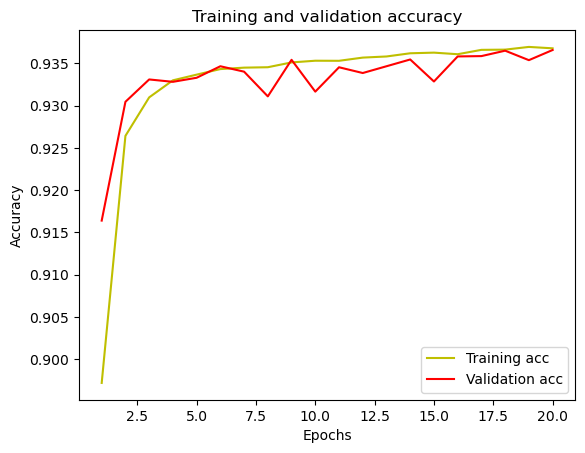

In [21]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

782/782 [==============================] - 6s 8ms/step


In [23]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.20      0.99      0.33      5031
           1       0.00      0.00      0.00      4960
           2       0.03      0.00      0.00      4930
           3       0.00      0.00      0.00      4942
           4       0.07      0.00      0.00      5137

    accuracy                           0.20     25000
   macro avg       0.06      0.20      0.07     25000
weighted avg       0.06      0.20      0.07     25000

[[4992    0   35    0    4]
 [4960    0    0    0    0]
 [4896    0    1    0   33]
 [4942    0    0    0    0]
 [5133    0    1    0    3]]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
